# Приоритизация гипотез, A/B-тест и анализ результатов.

## Описание проекта
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Часть 1. Приоритизация гипотез.

## Обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt

pd.options.display.max_colwidth = 1

try:
    hypothesis = pd.read_csv('datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

#Посмотрим что внутри
print('hypothesis')
display(hypothesis)
hypothesis.info()

hypothesis


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Небольшая таблица, все данные в порядке

## Задача 1.
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [2]:
hypothesis['ICE'] = round(((hypothesis['Impact']*hypothesis['Confidence']) / hypothesis['Efforts']), 3)

display(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


С фреймворком ICE приоритетной становится задача "Запустить акцию, дающую скидку на товар в день рождения".

## Задача 2.
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [3]:
hypothesis['RICE'] = (hypothesis['Impact']*hypothesis['Confidence']*hypothesis['Reach']) / hypothesis['Efforts']

display(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


С фреймворком RICE приоритетной становится задача "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	".

## Задача 3.
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Приоритет задач сильно различается для ICE и RICE методов. Хотя, задачи в конце списка остались примерно там же, но средний и высокий приоритет задач сместился. Метод ICE не учитывает охват аудитории, потому он не является всеобъемлющим и может быть более субъективным, чем RICE. В RICE большое влияние оказало количество пользователей, которых затронет изменение, даже если оно не очень существенное, но влияет на всех пользователей, то его стоит рассматривать в первую очередь.

# Часть 2.
Анализ A/B-теста

## Обзор данных

In [4]:
try:
    visitors, orders = (
        pd.read_csv('datasets/visitors.csv'),
        pd.read_csv('datasets/orders.csv')
    )
except:
    visitors, orders = (
        pd.read_csv('/datasets/visitors.csv'),
        pd.read_csv('/datasets/orders.csv')
    )

#Посмотрим что внутри
print('visitors')
display(visitors.head())
visitors.info()
print('-------------------------------------------------------------')
print('orders')
display(orders.head())
orders.info()

visitors


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
-------------------------------------------------------------
orders


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [5]:
print(visitors.duplicated().sum())
print(orders.duplicated().sum())

print(visitors.isna().sum())
print(orders.isna().sum())

0
0
date        0
group       0
visitors    0
dtype: int64
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


Дубликатов и пропусков в данных нет.

In [6]:
duplicates = (
    orders[['visitorId', 'group']]
    .groupby('visitorId')
    .agg({'group':'nunique'})
    .reset_index().query('group > 1')
)
display(duplicates.head())

orders = orders[~orders['visitorId'].isin(duplicates['visitorId'])]

display(orders.groupby('group').head())

print('Количество дубликатов: {:.0f}'.format(len(duplicates)))

,visitorId,group
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
10,3649131742,879864040,2019-08-15,4008,A
12,2809384911,3213223594,2019-08-15,7370,A
14,3859315276,1565034404,2019-08-15,10980,A


Количество дубликатов: 58


В таблице есть пользователи, которые попали сразу в обе группы. Для чистоты эксперимента удалим строки. Дубликатов всего 58 из 1197, меньше 1%, существенного влияние их отсутствие не окажет.

### Подготовка данных

In [7]:
#Дата в формат даты
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

#Число посетителей группы А ежедневно
visitors_A_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_A_daily.columns = ['date', 'visitors_per_date_A']

#Суммарное число посетителей группы А
visitors_A_cummulative = visitors_A_daily.apply(
    lambda x: visitors_A_daily[visitors_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_A': 'sum'}
    ),
    axis=1,
)
visitors_A_cummulative.columns = ['date', 'visitors_cummulative_A']

#Число посетителей группы В ежедневно
visitors_B_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_B_daily.columns = ['date', 'visitors_per_date_B']

#Суммарное число посетителей группы В
visitors_B_cummulative = visitors_B_daily.apply(
    lambda x: visitors_B_daily[visitors_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_B': 'sum'}
    ),
    axis=1,
)
visitors_B_cummulative.columns = ['date', 'visitors_cummulative_B']

#Число заказов группы А ежедневно
orders_A_daily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
orders_A_daily.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

#Суммарное число заказов группы А
orders_A_cummulative = orders_A_daily.apply(
    lambda x: orders_A_daily[orders_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_A': 'sum', 'revenue_per_date_A': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_A_cummulative.columns = [
    'date',
    'orders_cummulative_A',
    'revenue_cummulative_A',
]

#Число заказов группы В ежедневно
orders_B_daily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
orders_B_daily.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']

#Суммарное число заказов группы В
orders_B_cummulative = orders_B_daily.apply(
    lambda x: orders_B_daily[orders_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_B': 'sum', 'revenue_per_date_B': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_B_cummulative.columns = [
    'date',
    'orders_cummulative_B',
    'revenue_cummulative_B',
]

#Объединение таблиц
data = (
    orders_A_daily.merge(
        orders_B_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_B_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_A_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_B_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_B_cummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))
data.info()

,date,orders_per_date_A,revenue_per_date_A,orders_per_date_B,revenue_per_date_B,orders_cummulative_A,revenue_cummulative_A,orders_cummulative_B,revenue_cummulative_B,visitors_per_date_A,visitors_per_date_B,visitors_cummulative_A,visitors_cummulative_B
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    31 non-null     datetime64[ns]
 1   orders_per_date_A       31 non-null     int64         
 2   revenue_per_date_A      31 non-null     int64         
 3   orders_per_date_B       31 non-null     int64         
 4   revenue_per_date_B      31 non-null     int64         
 5   orders_cummulative_A    31 non-null     int64         
 6   revenue_cummulative_A   31 non-null     int64         
 7   orders_cummulative_B    31 non-null     int64         
 8   revenue_cummulative_B   31 non-null     int64         
 9   visitors_per_date_A     31 non-null     int64         
 10  visitors_per_date_B     31 non-null     int64         
 11  visitors_cummulative_A  31 non-null     int64         
 12  visitors_cummulative_B  31 non-null     int64       

Одна большая таблица со всем данными по группам: число поситителей, заказов, накопительные суммы.

## Задача 1.
Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

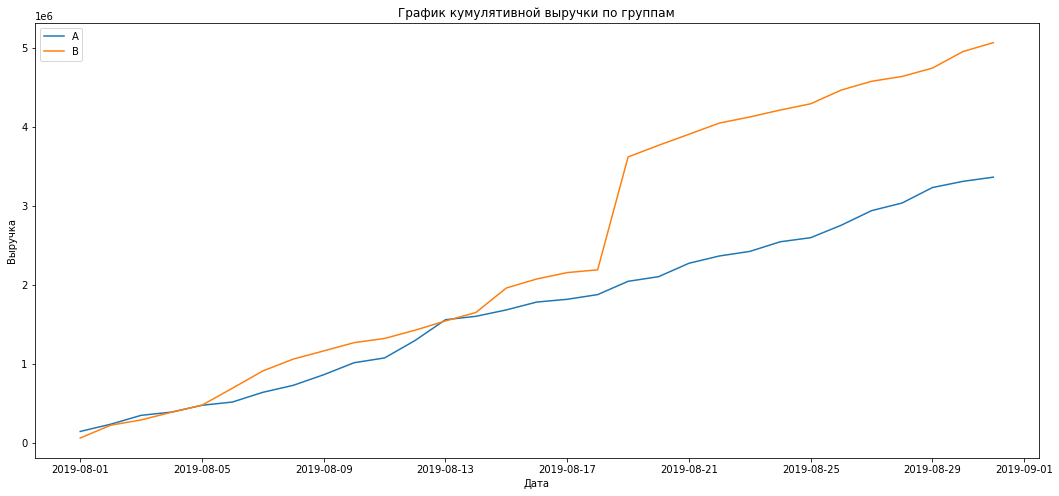

In [8]:
plt.figure(figsize=(18, 8))
plt.plot(data['date'], data['revenue_cummulative_A'], label='A')
plt.plot(data['date'], data['revenue_cummulative_B'], label='B')

plt.title('График кумулятивной выручки по группам')

plt.xlabel(u'Дата')
plt.ylabel(u'Выручка')

plt.legend();

В начале группы шли ровно, но в середине теста группа В вырвалась вперед, а после повышение происходило с тем же темпом, что и в группе А. Возможно, это влияние крупных заказов. В будущем следует исключить их влияние на общую картину.

## Задача 2.
Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

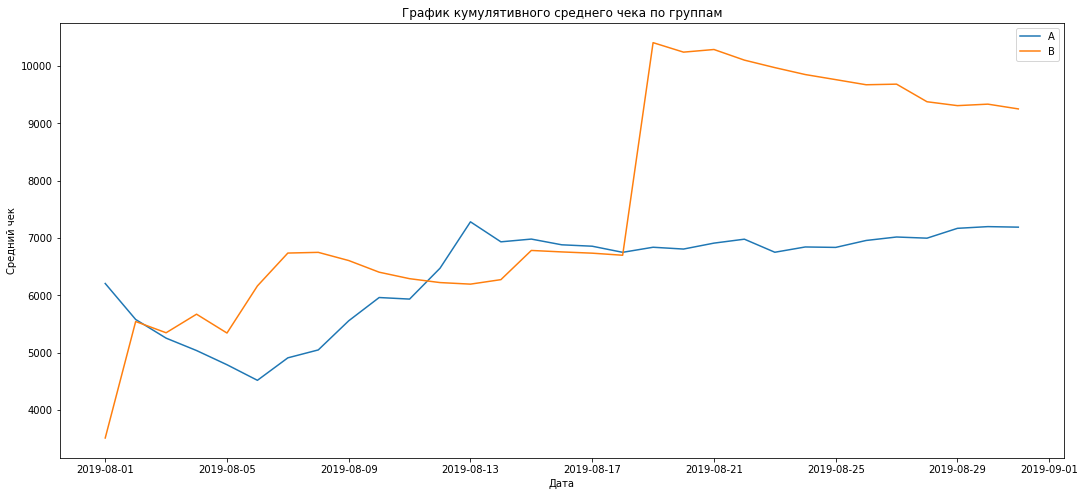

In [9]:
plt.figure(figsize=(18, 8))
plt.plot(data['date'], data['revenue_cummulative_A']/data['orders_cummulative_A'], label='A')
plt.plot(data['date'], data['revenue_cummulative_B']/data['orders_cummulative_B'], label='B')

plt.title('График кумулятивного среднего чека по группам')

plt.xlabel(u'Дата')
plt.ylabel(u'Средний чек')

plt.legend();

Здесь похожая картина: в начале графики скачут, но к середине теста уравниваются и снова группа В резко уходит в отрыв. Ближе к концу теста наблюдается снижение суммарного среднего чека. Налицо искажения, вызванные крупными разовыми покупками.

## Задача 3.
Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

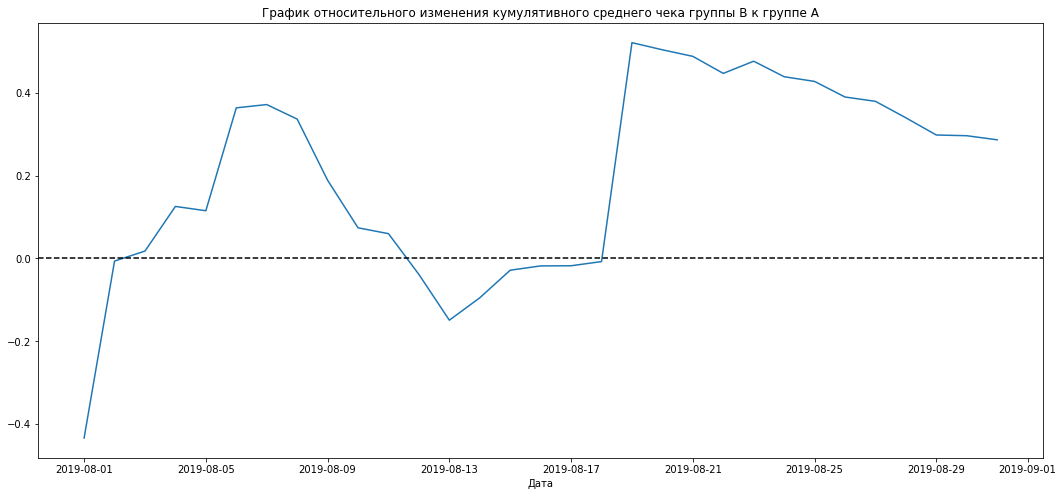

In [10]:
plt.figure(figsize=(18, 8))
plt.plot(
    data['date'],
    (data['revenue_cummulative_B']/data['orders_cummulative_B'])/
         (data['revenue_cummulative_A']/data['orders_cummulative_A'])
    -1
)

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

plt.xlabel(u'Дата')


plt.axhline(y=0, color='black', linestyle='--');

Результаты теста резко изменяются несколько раз. Вероятно, в эти даты и были совершены сномальные заказы.

## Задача 4.
Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

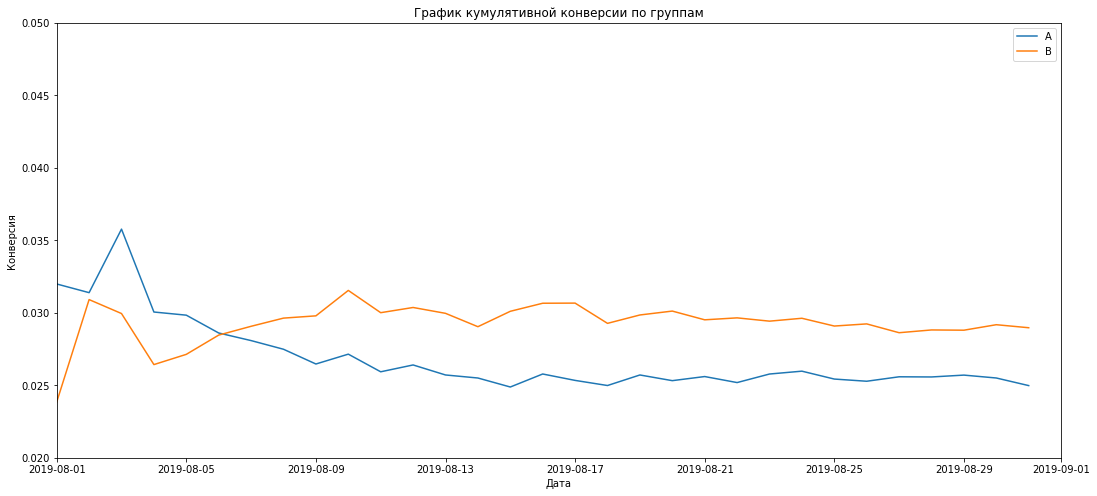

In [11]:
plt.figure(figsize=(18, 8))
plt.plot(data['date'], (data['orders_cummulative_A']/data['visitors_cummulative_A']), label='A')
plt.plot(data['date'], (data['orders_cummulative_B']/data['visitors_cummulative_B']), label='B')
plt.legend()

plt.title('График кумулятивной конверсии по группам')

plt.xlabel(u'Дата')
plt.ylabel(u'Конверсия')

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.02, 0.05]);

В начале теста график показывает колебания, но постепенно конверсия у обоих групп выровнялась. Группа В стабильно показывает более высокую конверсию.

## Задача 5.
Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

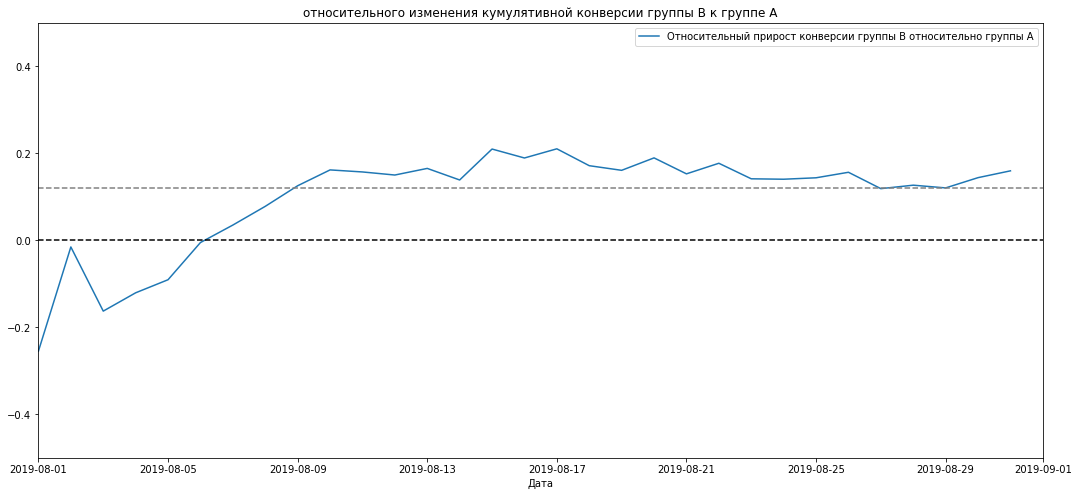

In [12]:
plt.figure(figsize=(18, 8))
plt.plot(data['date'],
         (data['orders_cummulative_B']/data['visitors_cummulative_B'])/
         (data['orders_cummulative_A']/data['visitors_cummulative_A'])-1,
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.title('относительного изменения кумулятивной конверсии группы B к группе A')

plt.xlabel(u'Дата')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.12, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.5, 0.5]);

Почти с самого начала теста группа В лидирует по конверсии: рост продолжался до 20%, а в конце теста зафиксировался в районе 12%.

## Задача 6.
Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

,visitorId,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


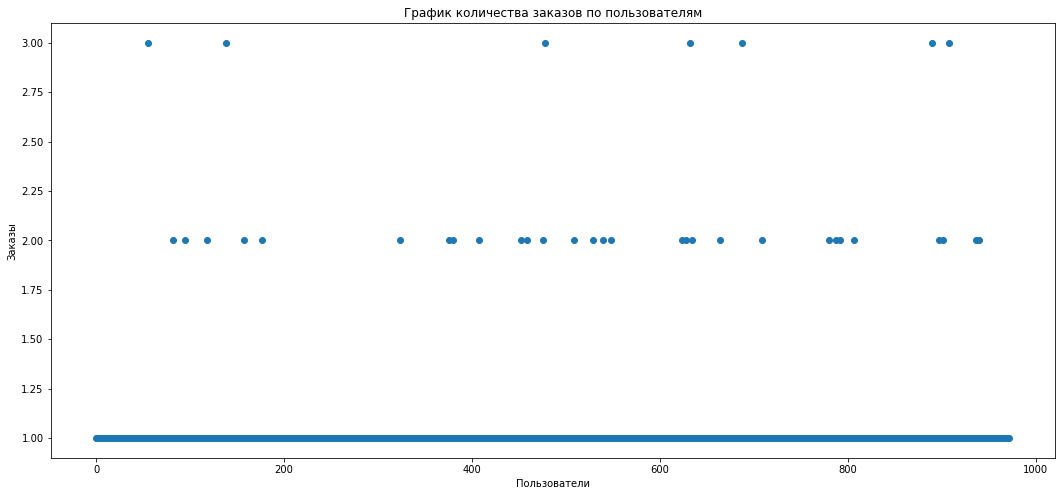

In [13]:
orders_by_users = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
orders_by_users.columns = ['visitorId', 'orders']

display(orders_by_users.head())

# серия из чисел от 0 до количества наблюдений в orders_by_users
x_values = pd.Series(range(0, len(orders_by_users)))

plt.figure(figsize=(18, 8))
plt.scatter(x=x_values, y=orders_by_users['orders'])

plt.title('График количества заказов по пользователям')

plt.xlabel(u'Пользователи')
plt.ylabel(u'Заказы');

Большинство пользователей делают 1 заказ. Есть некоторое количество пользователей с 2 и 3 заказами, но их меньшинство.

## Задача 7.
Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [14]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[1. 2.]


Не более 5% пользователей совершали одного двух заказа, не более 1% больше четырёх заказов. Разумно выбрать 2 заказа  на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

## Задача 8.
Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


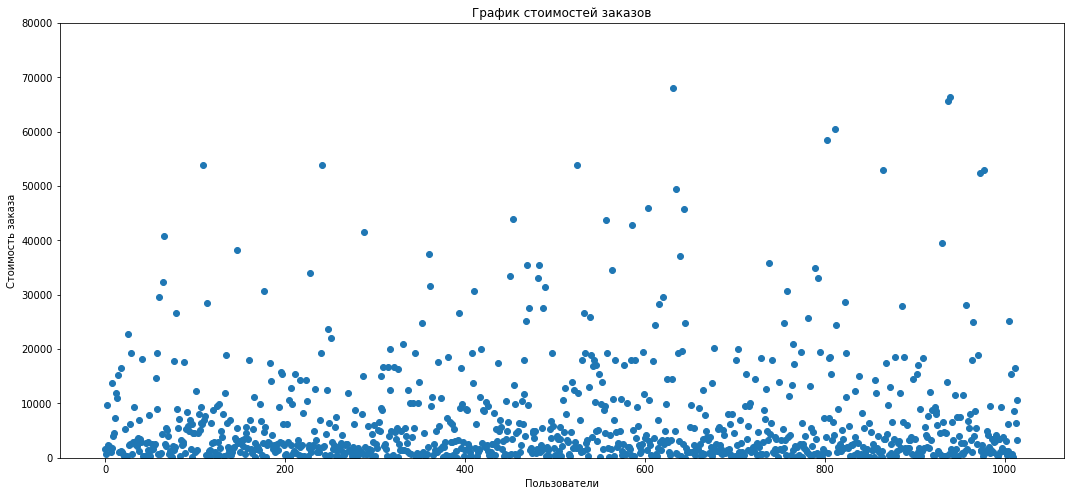

In [15]:
display(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(18, 8))
plt.scatter(x=x_values, y=orders['revenue'])
plt.ylim(0, 80000)

plt.title('График стоимостей заказов')

plt.xlabel(u'Пользователи')
plt.ylabel(u'Стоимость заказа');

Подавляющее большинство заказов до 30 тысяч, но есть и парочка мощных аномалий: 200 тысяч и 1.3 миллиона.

## Задача 9.
Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [16]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


У 5% пользователей чек дороже 26.8 тысяч, а у 1% дороже 53.9 тысяч. Тут тоже возьмем 95% пользоваталей и установим 28000 за верхнюю границу стоимости заказа.

## Задача 10.
Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Для всех последующих тестов применяется метод Манна-Уитни.

p-value = 0.05.

Так же, вычислим относительное различие в среднем между группами в каждом тесте.

Гипотеза для Задачи 10:

Статистически значимых различий в конверсии между группами по «сырым» данным нет.

In [17]:
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_by_users_A.columns = ['visitorId', 'orders']

orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_by_users_B.columns = ['visitorId', 'orders']

sample_A = pd.concat([orders_by_users_A['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])), name='orders')],axis=0)

sample_B = pd.concat([orders_by_users_B['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sample_A, sample_B)[1]))
print(
    "{0:.3f}".format(
        (data['orders_per_date_B'].sum() / data['visitors_per_date_B'].sum())
        / (data['orders_per_date_A'].sum() / data['visitors_per_date_A'].sum())
        - 1
    )
)

0.01102
0.160


Первое число — p-value = 0.01102 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами по «сырым» данным нет, отвергаем. Относительный выигрыш группы B равен 16% — второе число в выводе. Следует изучить данные без аномалий.

## Задача 11.
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Гипотеза для Задачи 11:

Статистически значимых различий в среднем чеке заказа между группами по «сырым» данным нет.

In [18]:
print("{0:.5f}".format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'], )[1]))
print("{0:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1))

0.82949
0.287


Первое число — p-value = 0.90179 больше 0.05. Значит, нулевую гипотезу о том, что статистически различий в среднем чеке заказа между группами по «сырым» данным нет, не отвергаем. Относительный выигрыш группы B равен 27.4% — второе число в выводе. Следует изучить данные без аномалий.

## Задача 12.
Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Гипотеза для Задачи 12:

Статистически значимых различий в конверсии между группами по «очищенным» данным нет.

In [19]:
#Создаем таблицу с аномальными заказами
users_with_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders'] > 2]['visitorId'],
        orders_by_users_B[orders_by_users_B['orders'] > 2]['visitorId'],
    ],
    axis=0,
)

users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitorId']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
#Анализ
sample_A_filtered = pd.concat(
    [
        orders_by_users_A[
            np.logical_not(orders_by_users_A['visitorId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_B_filtered = pd.concat(
    [
        orders_by_users_B[
            np.logical_not(orders_by_users_B['visitorId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.5f}'.format(stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]))
print('{0:.3f}'.format(sample_B_filtered.mean()/sample_A_filtered.mean()-1)) 

0.00945
0.189


Первое число — p-value = 0.00945 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами по «очищенным» данным нет, отвергаем. Относительный проигрыш группы А равен 1.89% — второе число в выводе. Статистические различия в конверсии есть.

## Задача 13.
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [20]:
print(
    '{0:.5f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.76169
-0.022


Первое число — p-value = 0.76169 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, не отвергаем. Относительный выигрыш группы А равен 2% — второе число в выводе. Статистических различий в среднем чеке нет.

## Задача 14.
Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

# Решение и общий вывод.
1. При применении различных методов приотеризации задач, следует учитывать и пользователей, которых коснутся изменений. Если их число велико или может сильно отличаться от задачи к задаче, то следует воспользоваться методом RICE. Он вывел в абсолютные лидеры задачу "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок ".

2. Следует остановить тест. Различия между группами небольшие (в районе 2%). Аномальные покупки (как сумма заказа, так и количество покупок) сильно влияют на результаты теста, но исключив их, явно видно, что данные стабилизировались и почти не отличаются между собой. Тем не менее, статистические различия в конверсии групп есть, лидирует группа В.